# https://shankarmsy.github.io/posts/pca-sklearn.html   
# Example 1: Starting by examining a simple dataset, the Iris data available by default in scikit-learn. The data consists of measurements of three different species of irises. There are three species of iris in the dataset: 1. Iris Virginica 2. Iris Setosa 3. Iris Versicolor

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
#checking to see what datasets are available in iris
print iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [9]:
#checking shape of data and list of features (X matrix)
print iris.data.shape
print iris.feature_names

#checking target values
print iris.target_names

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [30]:
import pandas as pd
#csv=comma separated values
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail(10)

,sepal_len,sepal_wid,petal_len,petal_wid,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
#importing and instantiating PCA with 2 components.
from sklearn.decomposition import PCA
pca = PCA(2)
print pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [12]:
#Fitting PCA to the iris dataset and transforming it into 2 principal components
X, y = iris.data, iris.target
X_proj = pca.fit_transform(X)
print X_proj.shape

(150, 2)


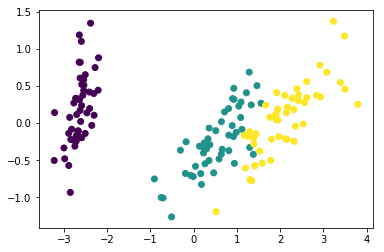

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Plotting the projected principal components and try to understand the data.
#Ignoring what's in y, it looks more like 2 clusters of data points rather than 3
#c=y colors the scatter plot based on y (target)
plt.scatter(X_proj[:,0], X_proj[:,1],c=y)
plt.show()

In [14]:
#pca.components_ has the meaning of each principal component, essentially how it was derived
#checking shape tells us it has 2 rows, one for each principal component and 4 columns, proportion of each of the 4 features
#for each row
print pca.components_
print pca.components_.shape

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
(2, 4)


In [15]:
#Trying to decipher the meaning of the principal components
print "Meaning of the 2 components:"
for component in pca.components_:
    print " + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names))

Meaning of the 2 components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.18 x petal length (cm) + -0.07 x petal width (cm)


In [16]:
#this tells us the extent to which each component explains the original dataset.
#so the 1st component is able to explain ~92% of X and the second only about 5.3%
#Together they can explain about 97.3% of the variance of X 
print pca.explained_variance_ratio_

[ 0.92461621  0.05301557]


In [17]:
#So if we only needed a 92% variance, we actually need just one component, let's verify
pca=PCA(0.92)
X_new=pca.fit_transform(X)
print X_new.shape

#If we need more than 97% variance, we begin to need more components
pca=PCA(0.98)
X_new=pca.fit_transform(X)
print X_new.shape

(150, 1)
(150, 3)


# Example 2 Moving to a larger dataset, the digits dataset, again available in scikit-learn

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


In [19]:
#looking at data, there looks to be 64 features, what are these?
print digits.data.shape
#another available dataset is called images. Let's check this out.
print digits.images.shape

#So, the features are nothing but a reshape of the images data 8X8 pixels thrown next to each other describing the  
#intensity of each pixel. The imput is a set of images of digits from which we need to learn the target, 
#which is the actual digit itself.

(1797, 64)
(1797, 8, 8)


In [20]:
#Running PCA retaining 95% of the variance 
X,y = digits.data, digits.target
pca_digits=PCA(0.95)
X_proj = pca_digits.fit_transform(X)
print X.shape, X_proj.shape

#So with 64 original features, we need 29 principal components to explain 95% of the original dataset

(1797, 64) (1797, 29)


In [21]:
#Let's run PCA with 2 components so as to plot the data in 2D
pca_digits=PCA(2)
X_proj = pca_digits.fit_transform(X)
print np.sum(pca_digits.explained_variance_ratio_)

#Note we only retain about 28% of the variance by choosing 2 components


0.285093648237


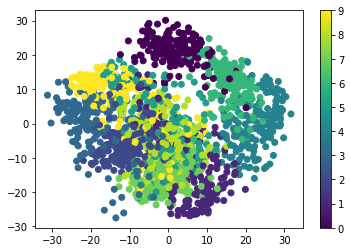

In [22]:
#Let's plot the principal components as a scatter plot
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.colorbar()
plt.show()

#This basically plots the 2 principal components and colors the values based on target (9 digits). 
#It beautifully explains some similarities in the data (though not enough). 
#Note that 0 is pretty much by itself while 1 is pretty close to 7.

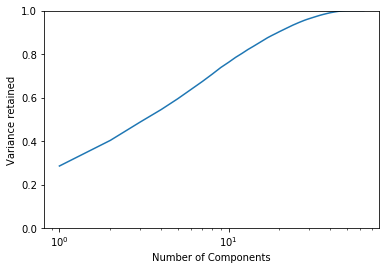

In [23]:
#How much data are we throwing away? 
#Lets try and plot number of components versus explained variance ratio as a cumulative sum to find out
pca_digits = PCA(64).fit(X)
plt.semilogx(np.cumsum(pca_digits.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance retained')
plt.ylim(0,1)
plt.show()

# Example 3: OK now onto a bigger challenge, let's try and compress a facial image dataset using PCA. Going to use the Olivetti face image dataset, again available in scikit-learn. Would like to reduce the original dataset using PCA, essentially compressing the images and see how the compressed images turn out by visualizing them.

In [24]:
#Before using PCA, let us try and understand as well as display the original images
#Note the Olivetti faces data is available in scikit-learn but not locally. It needs to be downloaded.
from sklearn.datasets import fetch_olivetti_faces
oliv=fetch_olivetti_faces()
print oliv.keys()

print oliv.data.shape #tells us there are 400 images that are 64 x 64 (4096) pixels each

['images', 'data', 'target', 'DESCR']
(400, 4096)


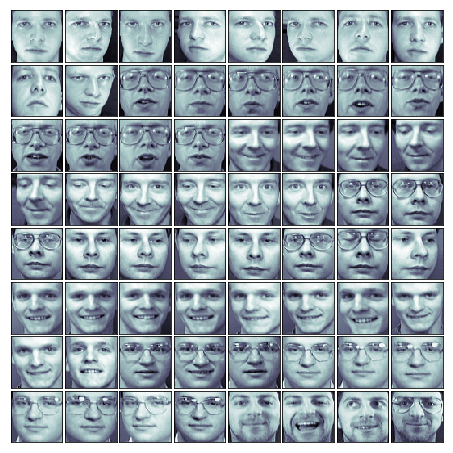

In [25]:
#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

In [26]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images.
X,y=oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print X_proj.shape

(400, 64)


In [27]:
print np.cumsum(pca_oliv.explained_variance_ratio_)

#That's terrific, compressing a 64x64 pixel image down to an 8x8 image still retains about 89.7% of the variance

[ 0.23812729  0.378067    0.45775314  0.50773645  0.54383493  0.57540433
  0.59967265  0.62003663  0.63961777  0.65633899  0.6722912   0.68666099
  0.6991284   0.71059973  0.72122851  0.73100571  0.74019631  0.74835205
  0.75589079  0.76336064  0.77034641  0.7764927   0.78233197  0.78802919
  0.7934911   0.79880964  0.8039478   0.8089062   0.81348283  0.81789465
  0.82191464  0.82575643  0.8293758   0.83272098  0.83592459  0.83908476
  0.84213594  0.84512208  0.84794275  0.8506823   0.85327878  0.85581734
  0.85826026  0.86065534  0.86296241  0.8652226   0.86744098  0.86964051
  0.87172497  0.87376981  0.87573194  0.87762396  0.87945915  0.88124153
  0.88298792  0.884685    0.88635374  0.88798109  0.88957903  0.89113266
  0.89265743  0.89413833  0.89560323  0.89702556]


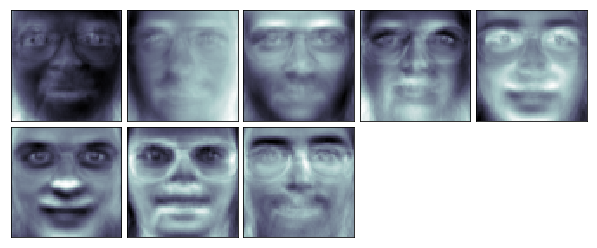

In [34]:
#This is great so far. Now we have a reduced 64 dimension dataset, generated with 64 principal components.
#Each of these principal components can explain some variation in the original dataset. The parameter components_ of the 
#estimator object gives the components with maximum variance

# Below we'll try to visualize the top 8 principal components. This is NOT a reconstruction of the original data, just 
# visualizing the principal components as images. The principal components are vectors of the length = to the number of 
# features 4096. We'll need to reshape it to a 64 x 64 matrix.

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(8):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

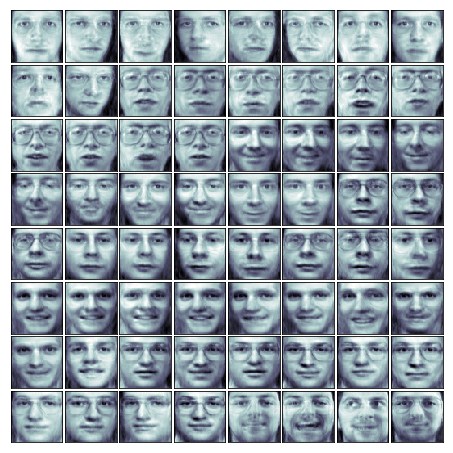

In [29]:
#Awesome, let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 
#64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images
#back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the 
#actual dimension of the original images so we can visualize them.

X_inv_proj = pca_oliv.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 dimension but 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')
    
# This is not bad at all, the image still looks pretty good but the finer details are missing, which is okay considering 
# we've reduced dimensionality by 64 times.